In [9]:
import pandas as pd
import plotly.graph_objects as go

df_all = pd.read_csv('data1.csv')

In [10]:
df_all.columns

Index(['SL.NO', 'NAME', 'AGE ', 'GENDER', 'UHID', 'PRESENTATION', 'Stage_1',
       'DOS', 'FNAC', 'Stage_2_class', 'HPE', 'Stage_3', 'Unnamed: 12',
       'CORRELATION YES/NO', 'Predicted ', 'Unnamed: 15'],
      dtype='object')

In [11]:
# CLINICAL DIAGNOSIS
# FNAC
df_all['Stage_3'] = df_all['Stage_3'].apply(lambda x: x.strip() if isinstance(x, str) else x)

print(df_all['Stage_1'].unique())
print(df_all['Stage_2_class'].unique())
print(df_all['Stage_3'].unique())



['CARCINOMA' 'BENIGN']
[4 2 5 3 1]
['THYROIDITIS' 'BENIGN' 'CARCINOMA']


In [12]:
df1 = df_all.groupby(['Stage_1', 'Stage_2_class'])['SL.NO'].count().reset_index()
df1.columns = ['source', 'target', 'value']
df1['target'] =df1['target'].map({1: 'COLLOID GOITRE B-I', 2: 'NODULAR GOITRE B-II', 3: 'FOLLICULAR NEOPLASM B-III', 4:'FOLLICULAR NEOPLASM B IV', 5:'PAPILLARY CARCINOMA B-V'})
df1

#labels = [f"{source} ({value})" for source, value in zip(all_links['source'], all_links['value'])]
#print(labels)

,source,target,value
0,BENIGN,COLLOID GOITRE B-I,3
1,BENIGN,NODULAR GOITRE B-II,67
2,BENIGN,FOLLICULAR NEOPLASM B-III,8
3,BENIGN,FOLLICULAR NEOPLASM B IV,5
4,BENIGN,PAPILLARY CARCINOMA B-V,2
5,CARCINOMA,NODULAR GOITRE B-II,2
6,CARCINOMA,FOLLICULAR NEOPLASM B-III,2
7,CARCINOMA,FOLLICULAR NEOPLASM B IV,6
8,CARCINOMA,PAPILLARY CARCINOMA B-V,11


In [13]:
df2 = df_all.groupby(['Stage_2_class', 'Stage_3'])['SL.NO'].count().reset_index()
df2.columns = ['source', 'target', 'value']
df2['source'] =df2['source'].map({1: 'COLLOID GOITRE B-I', 2: 'NODULAR GOITRE B-II', 3: 'FOLLICULAR NEOPLASM B-III', 4:'FOLLICULAR NEOPLASM B IV', 5:'PAPILLARY CARCINOMA B-V'})
df2['target'] =df2['target'].map({ 'BENIGN': 'BENIGN.', 'CARCINOMA': 'CARCINOMA.', 'THYROIDITIS': 'THYROIDITIS.'})
df2

,source,target,value
0,COLLOID GOITRE B-I,BENIGN.,2
1,COLLOID GOITRE B-I,CARCINOMA.,1
2,NODULAR GOITRE B-II,BENIGN.,54
3,NODULAR GOITRE B-II,CARCINOMA.,2
4,NODULAR GOITRE B-II,THYROIDITIS.,13
5,FOLLICULAR NEOPLASM B-III,BENIGN.,9
6,FOLLICULAR NEOPLASM B-III,THYROIDITIS.,1
7,FOLLICULAR NEOPLASM B IV,BENIGN.,9
8,FOLLICULAR NEOPLASM B IV,THYROIDITIS.,2
9,PAPILLARY CARCINOMA B-V,BENIGN.,3


In [14]:
df1_label = df_all.groupby(['Stage_1'])['SL.NO'].count().reset_index()
df1_label.columns = ['name', 'no']
print(df1_label)

df2_label = df_all.groupby(['Stage_2_class'])['SL.NO'].count().reset_index()
df2_label.columns = ['name', 'no']
df2_label['name'] = df2_label['name'].map({1: 'COLLOID GOITRE B-I', 2: 'NODULAR GOITRE B-II', 3: 'FOLLICULAR NEOPLASM B-III', 4:'FOLLICULAR NEOPLASM B IV', 5:'PAPILLARY CARCINOMA B-V'})
print(df2_label)

df3_label = df_all.groupby(['Stage_3'])['SL.NO'].count().reset_index()
df3_label.columns = ['name', 'no']
df3_label['name'] = df3_label['name'].map({ 'BENIGN': 'BENIGN.', 'CARCINOMA': 'CARCINOMA.', 'THYROIDITIS': 'THYROIDITIS.'})
print(df3_label)

df_label = pd.concat([df1_label, df2_label, df3_label], axis=0).reset_index()
print(df_label)

list_label = []
for i, row in df_label.iterrows():
    list_label.append( row['name'] + ' (' + str(row['no']) + ')')
print(list_label)

        name  no
0     BENIGN  85
1  CARCINOMA  21
                        name  no
0         COLLOID GOITRE B-I   3
1        NODULAR GOITRE B-II  69
2  FOLLICULAR NEOPLASM B-III  10
3   FOLLICULAR NEOPLASM B IV  11
4    PAPILLARY CARCINOMA B-V  13
           name  no
0       BENIGN.  77
1    CARCINOMA.  13
2  THYROIDITIS.  16
   index                       name  no
0      0                     BENIGN  85
1      1                  CARCINOMA  21
2      0         COLLOID GOITRE B-I   3
3      1        NODULAR GOITRE B-II  69
4      2  FOLLICULAR NEOPLASM B-III  10
5      3   FOLLICULAR NEOPLASM B IV  11
6      4    PAPILLARY CARCINOMA B-V  13
7      0                    BENIGN.  77
8      1                 CARCINOMA.  13
9      2               THYROIDITIS.  16
['BENIGN (85)', 'CARCINOMA (21)', 'COLLOID GOITRE B-I (3)', 'NODULAR GOITRE B-II (69)', 'FOLLICULAR NEOPLASM B-III (10)', 'FOLLICULAR NEOPLASM B IV (11)', 'PAPILLARY CARCINOMA B-V (13)', 'BENIGN. (77)', 'CARCINOMA. (13)', 'THYROIDI

In [15]:
all_links = pd.concat([df1, df2], axis=0)
print(all_links)

                       source                     target  value
0                      BENIGN         COLLOID GOITRE B-I      3
1                      BENIGN        NODULAR GOITRE B-II     67
2                      BENIGN  FOLLICULAR NEOPLASM B-III      8
3                      BENIGN   FOLLICULAR NEOPLASM B IV      5
4                      BENIGN    PAPILLARY CARCINOMA B-V      2
5                   CARCINOMA        NODULAR GOITRE B-II      2
6                   CARCINOMA  FOLLICULAR NEOPLASM B-III      2
7                   CARCINOMA   FOLLICULAR NEOPLASM B IV      6
8                   CARCINOMA    PAPILLARY CARCINOMA B-V     11
0          COLLOID GOITRE B-I                    BENIGN.      2
1          COLLOID GOITRE B-I                 CARCINOMA.      1
2         NODULAR GOITRE B-II                    BENIGN.     54
3         NODULAR GOITRE B-II                 CARCINOMA.      2
4         NODULAR GOITRE B-II               THYROIDITIS.     13
5   FOLLICULAR NEOPLASM B-III           

In [16]:
#for using with 'label' parameter in plotly 
#https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns
unique_source_target = list(pd.unique(all_links[['source', 'target']].values.ravel('K')))
print(unique_source_target)

#for assigning unique number to each source and target
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
print(mapping_dict)

#mapping of full data
all_links['source'] = all_links['source'].map(mapping_dict)
all_links['target'] = all_links['target'].map(mapping_dict)
print(all_links)

#converting full dataframe as list for using with in plotly
links_dict = all_links.to_dict(orient='list')
print(links_dict)

['BENIGN', 'CARCINOMA', 'COLLOID GOITRE B-I', 'NODULAR GOITRE B-II', 'FOLLICULAR NEOPLASM B-III', 'FOLLICULAR NEOPLASM B IV', 'PAPILLARY CARCINOMA B-V', 'BENIGN.', 'CARCINOMA.', 'THYROIDITIS.']
{'BENIGN': 0, 'CARCINOMA': 1, 'COLLOID GOITRE B-I': 2, 'NODULAR GOITRE B-II': 3, 'FOLLICULAR NEOPLASM B-III': 4, 'FOLLICULAR NEOPLASM B IV': 5, 'PAPILLARY CARCINOMA B-V': 6, 'BENIGN.': 7, 'CARCINOMA.': 8, 'THYROIDITIS.': 9}
    source  target  value
0        0       2      3
1        0       3     67
2        0       4      8
3        0       5      5
4        0       6      2
5        1       3      2
6        1       4      2
7        1       5      6
8        1       6     11
0        2       7      2
1        2       8      1
2        3       7     54
3        3       8      2
4        3       9     13
5        4       7      9
6        4       9      1
7        5       7      9
8        5       9      2
9        6       7      3
10       6       8     10
{'source': [0, 0, 0, 0, 0, 1, 1, 1, 

In [19]:
import matplotlib.pyplot as plt

#Sankey Diagram Code
plt.rcParams["figure.figsize"] = (20, 15)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 25,
      line = dict(color = "black", width = 0.8),
      label = list_label
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"],
      #hovertemplate='%{source} -> %{target}: %{value}<extra></extra>'
  
  ))])

#fig.update_traces(line=dict(color="orange"))
#fig.update_layout(title_text="Diagnosis results at various stages with no. of patients ", font_size=15, font=dict(family="Arial", size=15, color='blue'), width=1000, height=600, title_x=0.5)
fig.update_layout(title_text="", font_size=15, font=dict(family="Arial", size=15, color='blue'), width=1000, height=600, title_x=0.5)
fig.show()

fig.write_image("fig1.png")
#On hovering mouse over the diagram more details are visible

In [22]:
df_all['GENDER'] = df_all['GENDER'].map({ 'M': 'Male', 'F': 'Female'})

bins = [0, 30, 40, 50, 60, 70, 100]
group = ['<30', '30-40', '40-50', '50-60', '60-70', '70<']
df_all['age_group'] = pd.cut(df_all['AGE '], bins=bins, labels=group, right=False).cat.add_categories('missing').fillna('missing')
df_all

,SL.NO,NAME,AGE,GENDER,UHID,PRESENTATION,Stage_1,DOS,FNAC,Stage_2_class,HPE,Stage_3,Unnamed: 12,CORRELATION YES/NO,Predicted,Unnamed: 15,age_group
0,1,RATHI SHEDTHI,67.0,Female,1481122,SOLITARY NODULE WITH LYMPH NODES,CARCINOMA,27/3/2023,PAPILLARY CARCINOMA B-IV,4,HASHIMOTO'S THYROIDITIS,THYROIDITIS,0,N,TN,93.0,60-70
1,2,SHABEENA,22.0,Female,1482969,SOLITARY NODULE - SUDDEN INCREASE IN SIZE,CARCINOMA,29/3/2024,FOLLICULAR NEOPLASM B- IV,4,MULTINODULAR GOITRE,BENIGN,1,N,TN,NaN,<30
2,3,VINAY K,31.0,Male,1400945,SOLITARY NODULE,BENIGN,29/3/2023,NODULAR GOITRE B-II,2,GRAVE'S DISEASE,THYROIDITIS,1,N,TN,NaN,30-40
3,4,REKHA,35.0,Female,1484783,SOLITARY NODULE,BENIGN,8/4/2023,"NODULAR GOITRE, B- II",2,MULTINODULAR GOITRE,BENIGN,1,Y,TN,NaN,30-40
4,5,SALMA,38.0,Female,1485303,SOLITARY NODULE,BENIGN,15/4/2023,"NODULAR GOITRE, B - II",2,MULTINODULAR GOITRE,BENIGN,1,Y,TN,NaN,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,SUMITRA,41.0,Female,1548963,SOLITARY NODULE,BENIGN,23/12/2023,FOLLICULAR NEOPLASM B-IV,4,MULTINODULAR GOITRE,BENIGN,1,N,TN,NaN,40-50
102,103,DUNDAVVA NARAGUND,60.0,Female,1568604,SOLITARY NODULE,BENIGN,28/3/24,"ATYPIA OF UNDETERMINED SIGNIFICANCE, B- III",3,MULTINODULAR GOITRE,BENIGN,1,N,TN,NaN,60-70
103,104,KASTURI HANCHINMANI,38.0,Female,738497,SOLITARY NODULE,BENIGN,12/4/24,NODULAR GOITRE B-II,2,MULTINODULAR GOITRE,BENIGN,1,Y,TN,NaN,30-40
104,105,SEEMAKOUZAR MIRZA,31.0,Female,1578704,SOLITARY NODULE SUDDEN INCREASE IN SIZE,CARCINOMA,21/5/2024,FOLLICULAR NEOPLASM B-III,3,FOLLICULAR ADENOMA,BENIGN,1,Y,TN,NaN,30-40


In [23]:
print(df_all)

     SL.NO                 NAME  AGE   GENDER     UHID  \
0        1        RATHI SHEDTHI  67.0  Female  1481122   
1        2             SHABEENA  22.0  Female  1482969   
2        3              VINAY K  31.0    Male  1400945   
3        4                REKHA  35.0  Female  1484783   
4        5                SALMA  38.0  Female  1485303   
..     ...                  ...   ...     ...      ...   
101    102              SUMITRA  41.0  Female  1548963   
102    103    DUNDAVVA NARAGUND  60.0  Female  1568604   
103    104  KASTURI HANCHINMANI  38.0  Female   738497   
104    105    SEEMAKOUZAR MIRZA  31.0  Female  1578704   
105    106             RATNAVVA  49.0  Female  4677822   

                                  PRESENTATION    Stage_1         DOS  \
0             SOLITARY NODULE WITH LYMPH NODES  CARCINOMA   27/3/2023   
1    SOLITARY NODULE - SUDDEN INCREASE IN SIZE  CARCINOMA   29/3/2024   
2                             SOLITARY NODULE      BENIGN   29/3/2023   
3          

In [24]:
df_all.to_csv('out.csv')

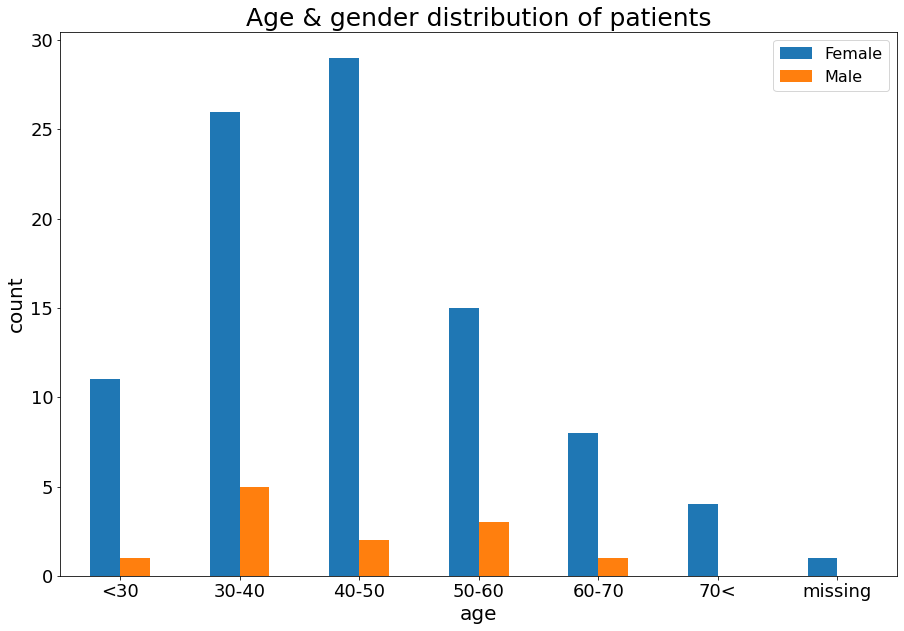

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams['figure.facecolor'] = 'white'

#df_bar = pd.DataFrame(df_all, columns=["age_group","GENDER"])
ax = pd.crosstab(df_all['age_group'],df_all['GENDER']).plot.bar()

ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('count', fontsize=20)

ax.tick_params(axis='x', labelrotation='auto', labelsize=18)
ax.tick_params(axis='y', labelrotation='auto', labelsize=18)

ax.legend(prop={'size': 16})
ax.set_title('Age & gender distribution of patients', fontsize=25)

ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='white', zorder=-1))
plt.savefig('my_plot.png') 

In [27]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [28]:
df_gender = df_all.groupby(['GENDER'])['SL.NO'].count().reset_index()
print(df_gender)


df_gender['percent'] = (df_gender['SL.NO'] / df_gender['SL.NO'].sum()) * 100
print(df_gender)

   GENDER  SL.NO
0  Female     94
1    Male     12
   GENDER  SL.NO    percent
0  Female     94  88.679245
1    Male     12  11.320755


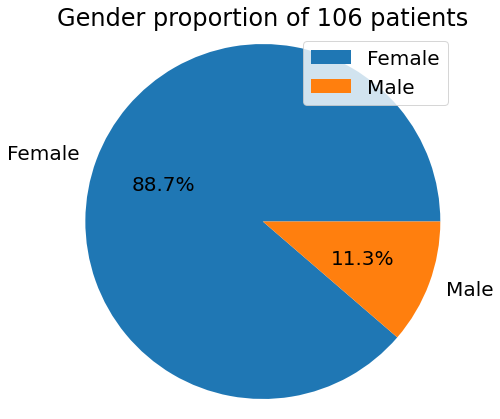

In [29]:
column_to_plot = 'percent'

plt.rcParams.update({'font.size': 20})
# Create the pie chart
plt.figure(figsize=(7, 7))  # Adjust figure size as desired
plt.pie(df_gender[column_to_plot], labels=df_gender['GENDER'], autopct="%1.1f%%")  # Add labels and percentages

# Optional customizations (titles, legend, etc.)
plt.title('Gender proportion of 106 patients')
plt.legend(df_gender['GENDER'], loc='best')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.savefig('my_plot_1.png')

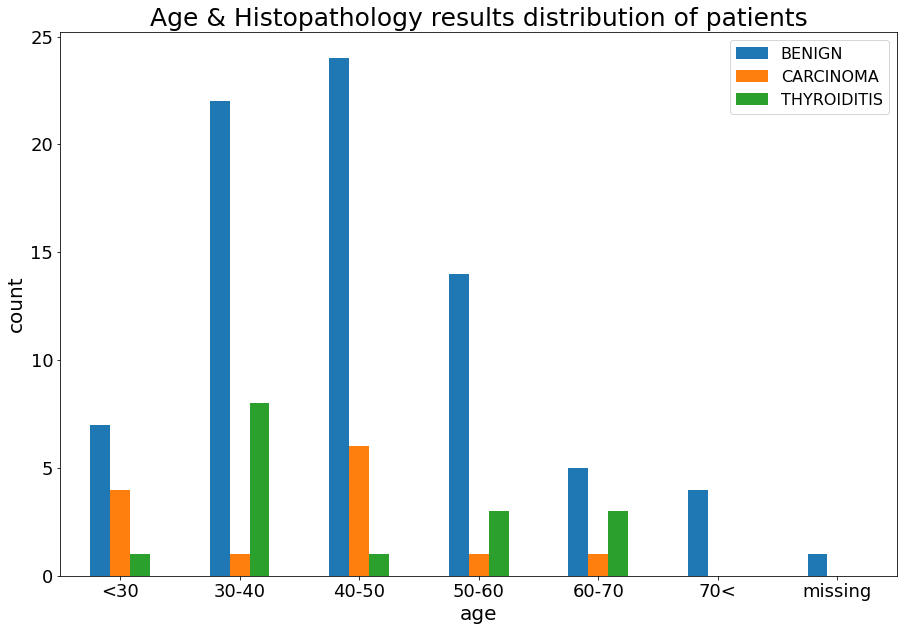

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams['figure.facecolor'] = 'white'

#df_bar = pd.DataFrame(df_all, columns=["age_group","GENDER"])
ax = pd.crosstab(df_all['age_group'],df_all['Stage_3']).plot.bar()

ax.set_xlabel('age', fontsize=20)
ax.set_ylabel('count', fontsize=20)

ax.tick_params(axis='x', labelrotation='auto', labelsize=18)
ax.tick_params(axis='y', labelrotation='auto', labelsize=18)

ax.legend(prop={'size': 16})
ax.set_title('Age & Histopathology results distribution of patients', fontsize=25)

ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='white', zorder=-1))
plt.savefig('age_hist.png') 

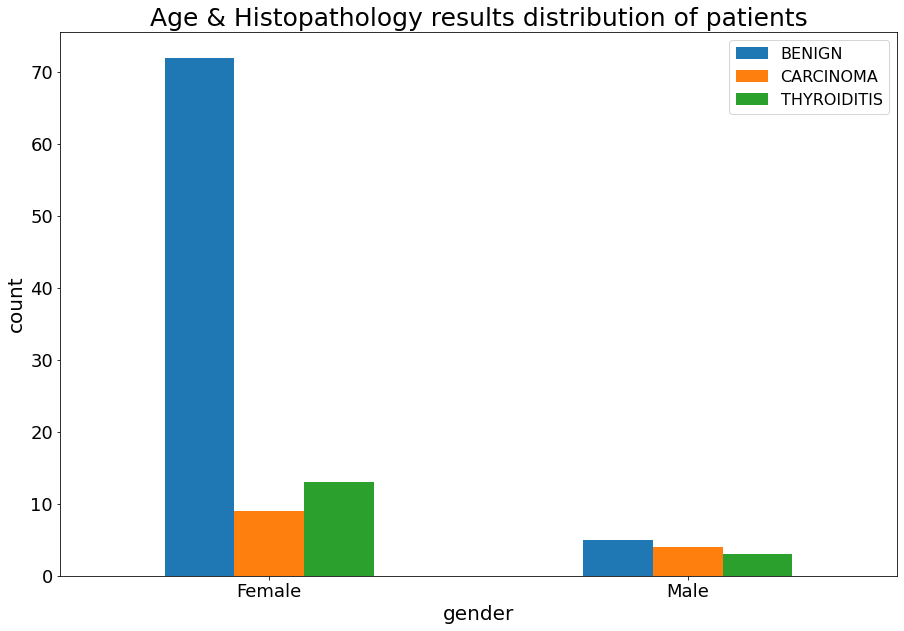

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams['figure.facecolor'] = 'white'

#df_bar = pd.DataFrame(df_all, columns=["age_group","GENDER"])
ax = pd.crosstab(df_all['GENDER'],df_all['Stage_3']).plot.bar()

ax.set_xlabel('gender', fontsize=20)
ax.set_ylabel('count', fontsize=20)

ax.tick_params(axis='x', labelrotation='auto', labelsize=18)
ax.tick_params(axis='y', labelrotation='auto', labelsize=18)

ax.legend(prop={'size': 16})
ax.set_title('Age & Histopathology results distribution of patients', fontsize=25)

ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='white', zorder=-1))
plt.savefig('age_cancer.png') 